###Data Analytics - Lab 1 - Random data visualisation and sampling

##1. Create a jupyter notebook.

## 2. Using numpy.random generate arrays of:

### 1000 samples of uniform distribution on interval [0,1]

In [1]:
import numpy as np
arr = np.random.uniform(0,1,1000)

###1000 samples of normal distribution with mean mu = 0 and standard deviation sigma = 1

In [2]:
mu, sigma = 0,1
arr_2 = np.random.normal(mu,sigma,1000)

### 1000 samples of normal distribution with mean mu = 0 and standard deviation sigma = 100

In [3]:
mu, sigma = 0,100
arr_3 = np.random.normal(mu,sigma,1000)

###1000 samples of beta distribution for the following pairs of parameters (alpha, beta) zawiera (1,1), (2,2),(3,9) 

In [5]:
arr_4 = np.random.beta(2,2,1000)
arr_5 = np.random.beta(3,9,1000)
arr_6 = np.random.beta(1,1,1000)

### 10000 samples of two-dimensional normal distributions each with mean mu = [0,0]^T and covariance matrices

In [6]:
cov_1 = np.eye(2)
cov_2 = np.array([[2,1],[1,2]])
arr_7 = np.random.multivariate_normal(np.array([0,0]).T,cov_1,10000)
arr_8 = np.random.multivariate_normal(np.array([0,0]).T,cov_2,10000)

### 3. For one dimensional distributions plot histograms. Assign bin values to represent the geometry of distribution. Compare the histograms (normalized) with plots of analytical formulas for distributions (see eg. Wikipedia).

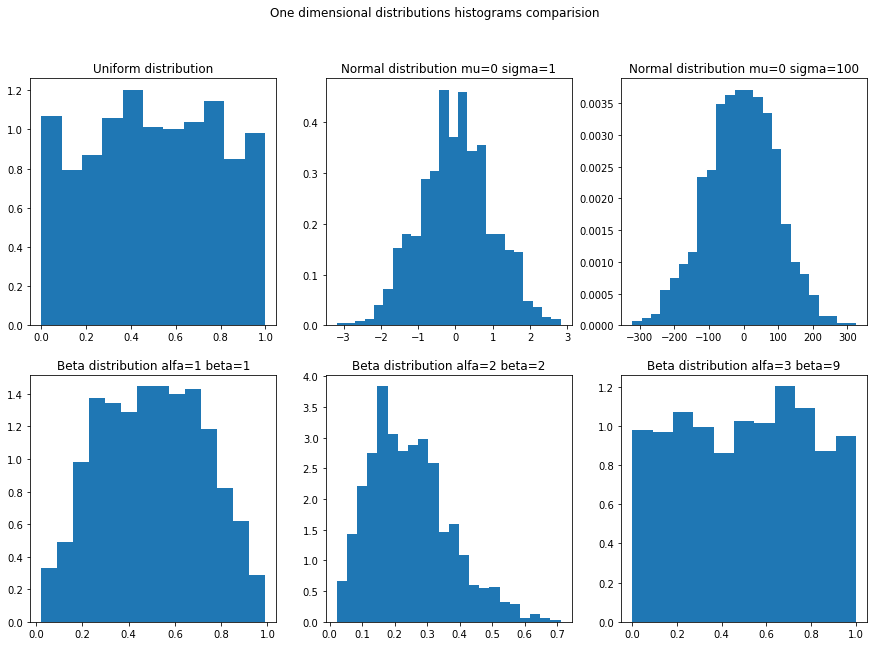

In [16]:
import matplotlib.pyplot as plt
# his = np.histogram(np.random.uniform(0,1,1000), bins = 'auto')

fig, axs = plt.subplots(2, 3, figsize=(15,10))

plt.suptitle("One dimensional distributions histograms comparision")

axs[0, 0].hist(arr, bins='auto',density = True)
axs[0, 0].set_title('Uniform distribution')

axs[0, 1].hist(arr_2, bins='auto', density = True)
axs[0, 1].set_title('Normal distribution mu=0 sigma=1')

axs[0, 2].hist(arr_3, bins='auto', density = True)
axs[0, 2].set_title('Normal distribution mu=0 sigma=100')

axs[1, 0].hist(arr_4, bins='auto', density = True)
axs[1, 0].set_title('Beta distribution alfa=1 beta=1')

axs[1, 1].hist(arr_5, bins='auto', density = True)
axs[1, 1].set_title('Beta distribution alfa=2 beta=2')

axs[1, 2].hist(arr_6, bins='auto', density = True)
axs[1, 2].set_title('Beta distribution alfa=3 beta=9')

plt.show()

## 4. For two-dimensional distributions use hist2d method from pyplot. Try to analyze influence of bins. Try different 2d histogram functions (ex. from seaborn).

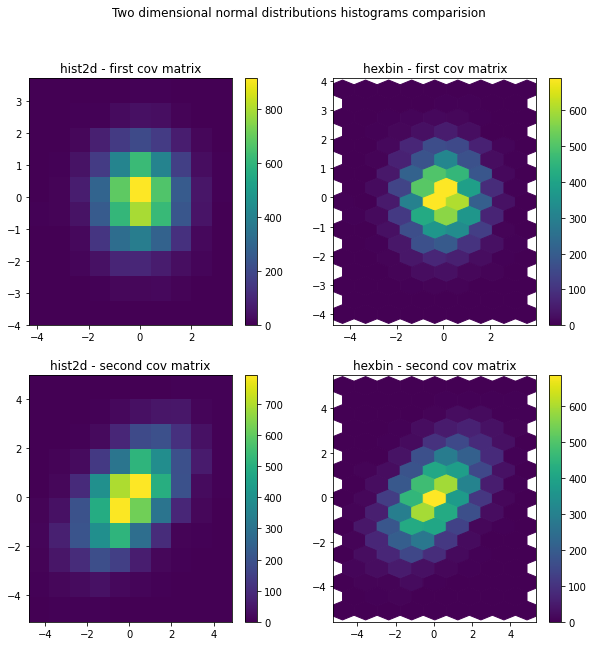

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

plt.suptitle("Two dimensional normal distributions histograms comparision")

_, _, _, cbar = axs[0, 0].hist2d(arr_7[:, 0], arr_7[:,1])
fig.colorbar(cbar, ax=axs[0, 0])
axs[0, 0].set_title("hist2d - first cov matrix")

cbar = axs[0, 1].hexbin(arr_7[:,0], arr_7[:,1], gridsize=(8,8))
fig.colorbar(cbar, ax=axs[0, 1])
axs[0, 1].set_title("hexbin - first cov matrix")

_, _, _, cbar = axs[1, 0].hist2d(arr_8[:, 0], arr_8[:,1])
fig.colorbar(cbar, ax=axs[1, 0])
axs[1, 0].set_title("hist2d - second cov matrix")

cbar = axs[1, 1].hexbin(arr_8[:,0], arr_8[:,1], gridsize=(8,8))
fig.colorbar(cbar, ax=axs[1, 1])
axs[1, 1].set_title("hexbin - second cov matrix")

plt.show()

## 5. Generate 1000 points from the following model ( First sample alpha,beta, x, sigma then compute mu algebraically, then sample a value of y. Do this 1000 times. To get HalfNormal sample from Normal and take the absolute value of result) 


In [9]:
SAMPLES = 1000

alpha = np.random.normal(2, 0.1,SAMPLES)
beta = np.random.normal(0.2, 0.2,SAMPLES)
x = np.random.normal(0, 3, SAMPLES)
sigma = np.abs(np.random.normal(0, 1, SAMPLES))

mi = alpha + beta * x 

y = np.zeros(SAMPLES)
for i in range(SAMPLES):
  y[i] = np.random.normal(mi[i], sigma[i])

## 6.Plot y values as a function of x. Compare them with x lines of y = alpha +betax\, plotted for between -6 and 6 for each of randomly sampled alfa and beta pair (on the same plot).

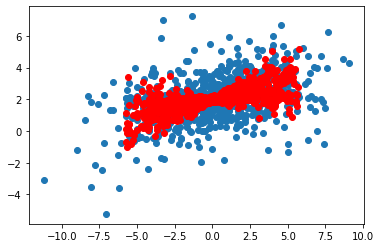

In [12]:
plt.scatter(x, y)


for i in range(len(x)):
  if -6 < x[i] < 6:
    new_y = alpha[i] + beta[i] * x[i]
    plt.scatter(x[i], new_y, color='r')
plt.show()

